In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
import gpxpy 
import gpxpy.gpx
from gps_utils import rdp

# Acceleration Analysis

In [5]:
data = pd.read_csv("./data/2023-10-1507.35.21.csv")
data


,time,gFx,gFy,gFz,TgF
0,07:35:21:3860,-0.0250,0.0717,0.9905,0.993
1,07:35:21:3870,-0.0329,0.0717,0.9905,0.994
2,07:35:21:3880,-0.0367,0.0679,0.9944,0.997
3,07:35:21:3880,-0.0173,0.0717,0.9983,1.001
4,07:35:21:3880,-0.0133,0.0640,0.9865,0.989
...,...,...,...,...,...
183923,07:47:36:2390,0.0179,0.0288,0.9983,0.999
183924,07:47:36:2410,0.0061,0.0288,0.9905,0.991
183925,07:47:36:2480,0.0179,0.0366,0.9827,0.983
183926,07:47:36:2490,0.0179,0.0326,0.9905,0.991


In [6]:
acceleration = pd.DataFrame(
        {'time'  : data.time.values, 
         'x_direction'  : data.gFx.values,
         'y_direction' : data.gFy.values,
         'z_direction' : data.gFz.values,
         'g_force' : data.TgF.values
        } )

In [7]:
acceleration.head(100)

,time,x_direction,y_direction,z_direction,g_force
0,07:35:21:3860,-0.0250,0.0717,0.9905,0.993
1,07:35:21:3870,-0.0329,0.0717,0.9905,0.994
2,07:35:21:3880,-0.0367,0.0679,0.9944,0.997
3,07:35:21:3880,-0.0173,0.0717,0.9983,1.001
4,07:35:21:3880,-0.0133,0.0640,0.9865,0.989
...,...,...,...,...,...
95,07:35:21:7090,-0.0329,0.0405,1.0140,1.015
96,07:35:21:7100,-0.0250,0.0405,1.0140,1.015
97,07:35:21:7230,-0.0173,0.0444,1.0061,1.007
98,07:35:21:7250,-0.0211,0.0484,1.0179,1.019


In [8]:
count= acceleration["x_direction"].value_counts() 
count

-0.0015    6804
 0.0061    6718
 0.0023    6698
 0.0140    6625
 0.0179    6594
           ... 
 0.5611       1
 0.5650       1
 0.6979       1
-0.4588       1
-0.4979       1
Name: x_direction, Length: 277, dtype: int64

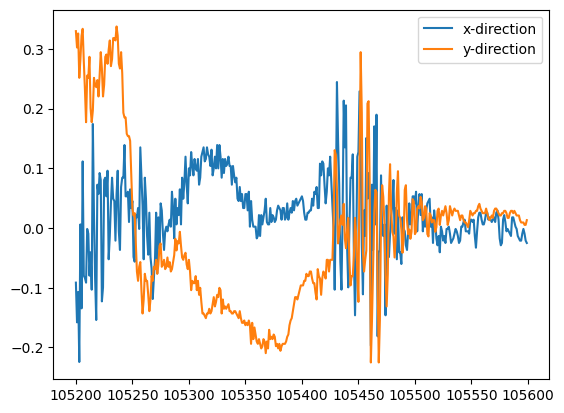

In [9]:
data_x = acceleration["x_direction"][105200:105600]
data_y = acceleration["y_direction"][105200:105600]
plt.plot(data_x,label="x-direction")
plt.plot(data_y,label="y-direction")
plt.legend()

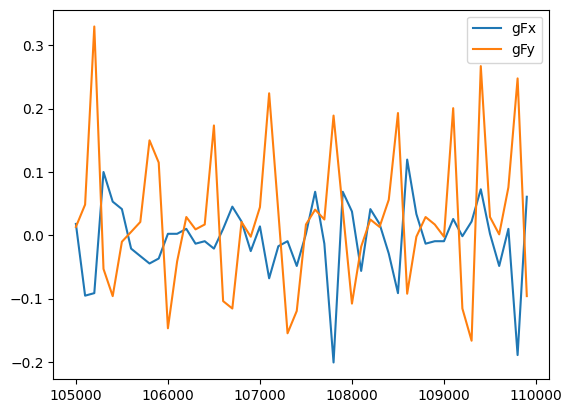

In [10]:

plt.plot(acceleration["x_direction"][105000:110000:100],label="gFx")
plt.plot(acceleration["y_direction"][105000:110000:100],label="gFy")
plt.legend()
plt.show()

# GPS Analysis

In [11]:
gpx_file = open('./data/activity_12320694757.gpx', 'r')
gpx = gpxpy.parse(gpx_file)


In [12]:
!gpxinfo './data/activity_12320694757.gpx'

File: /Users/halilbayindir/Desktop/Comparison/activity_12320694757.gpx
    Length 2D: 8.733km
    Length 3D: 8.733km
    Moving time: 00:52:05
    Stopped time: 00:03:33
    Max speed: 3.71m/s = 13.36km/h (raw: 4.92m/s = 17.72km/h)
    Avg speed: 2.78m/s = 10.03km/h
    Total uphill: 0.00m
    Total downhill: 0.00m
    Started: 2023-10-15 04:35:25+00:00
    Ended: 2023-10-15 05:31:30+00:00
    Points: 3244
    Avg distance between points: 2.69m

    Track #0, Segment #0
        Length 2D: 8.733km
        Length 3D: 8.733km
        Moving time: 00:52:05
        Stopped time: 00:03:33
        Max speed: 3.71m/s = 13.36km/h (raw: 4.92m/s = 17.72km/h)
        Avg speed: 2.78m/s = 10.03km/h
        Total uphill: 0.00m
        Total downhill: 0.00m
        Started: 2023-10-15 04:35:25+00:00
        Ended: 2023-10-15 05:31:30+00:00
        Points: 3244
        Avg distance between points: 2.69m



In [13]:
moving_data = gpx.get_moving_data(raw=True)
moving_data

MovingData(moving_time=3125.0, stopped_time=213.0, moving_distance=8703.00390903706, stopped_distance=30.398185149497653, max_speed=4.921264308524091)

In [26]:
segment = gpx.tracks[0].segments[0]

times = [p.time for p in segment.points]

coords = pd.DataFrame([
        {'lat': p.latitude, 
         'lon': p.longitude, 
         'ele': p.elevation,
         'time': p.time} for p in segment.points])
coords

,lat,lon,ele,time
0,41.104742,28.922270,None,2023-10-15 04:35:25+00:00
1,41.104745,28.922264,None,2023-10-15 04:35:26+00:00
2,41.104748,28.922260,None,2023-10-15 04:35:27+00:00
3,41.104752,28.922254,None,2023-10-15 04:35:28+00:00
4,41.104754,28.922250,None,2023-10-15 04:35:29+00:00
...,...,...,...,...
3239,41.104674,28.922358,None,2023-10-15 05:31:26+00:00
3240,41.104669,28.922376,None,2023-10-15 05:31:27+00:00
3241,41.104665,28.922394,None,2023-10-15 05:31:28+00:00
3242,41.104660,28.922412,None,2023-10-15 05:31:29+00:00


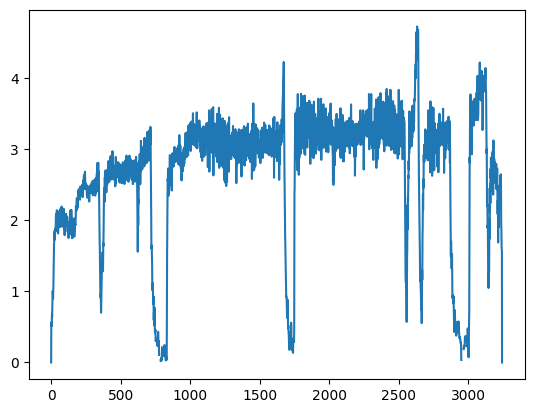

In [17]:
segment.points[0].speed, segment.points[-1].speed = 0., 0.
gpx.add_missing_speeds()
speed = np.array([p.speed for p in segment.points])
plt.plot(speed)

In [21]:
new_speed = []
for i in speed:
    if i != None:
        new_speed.append(i)


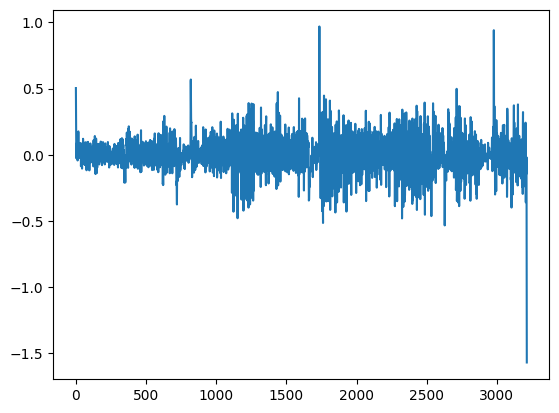

In [22]:
acceleration = np.gradient(new_speed)
plt.plot(acceleration)

In [23]:
len(acceleration)

3214

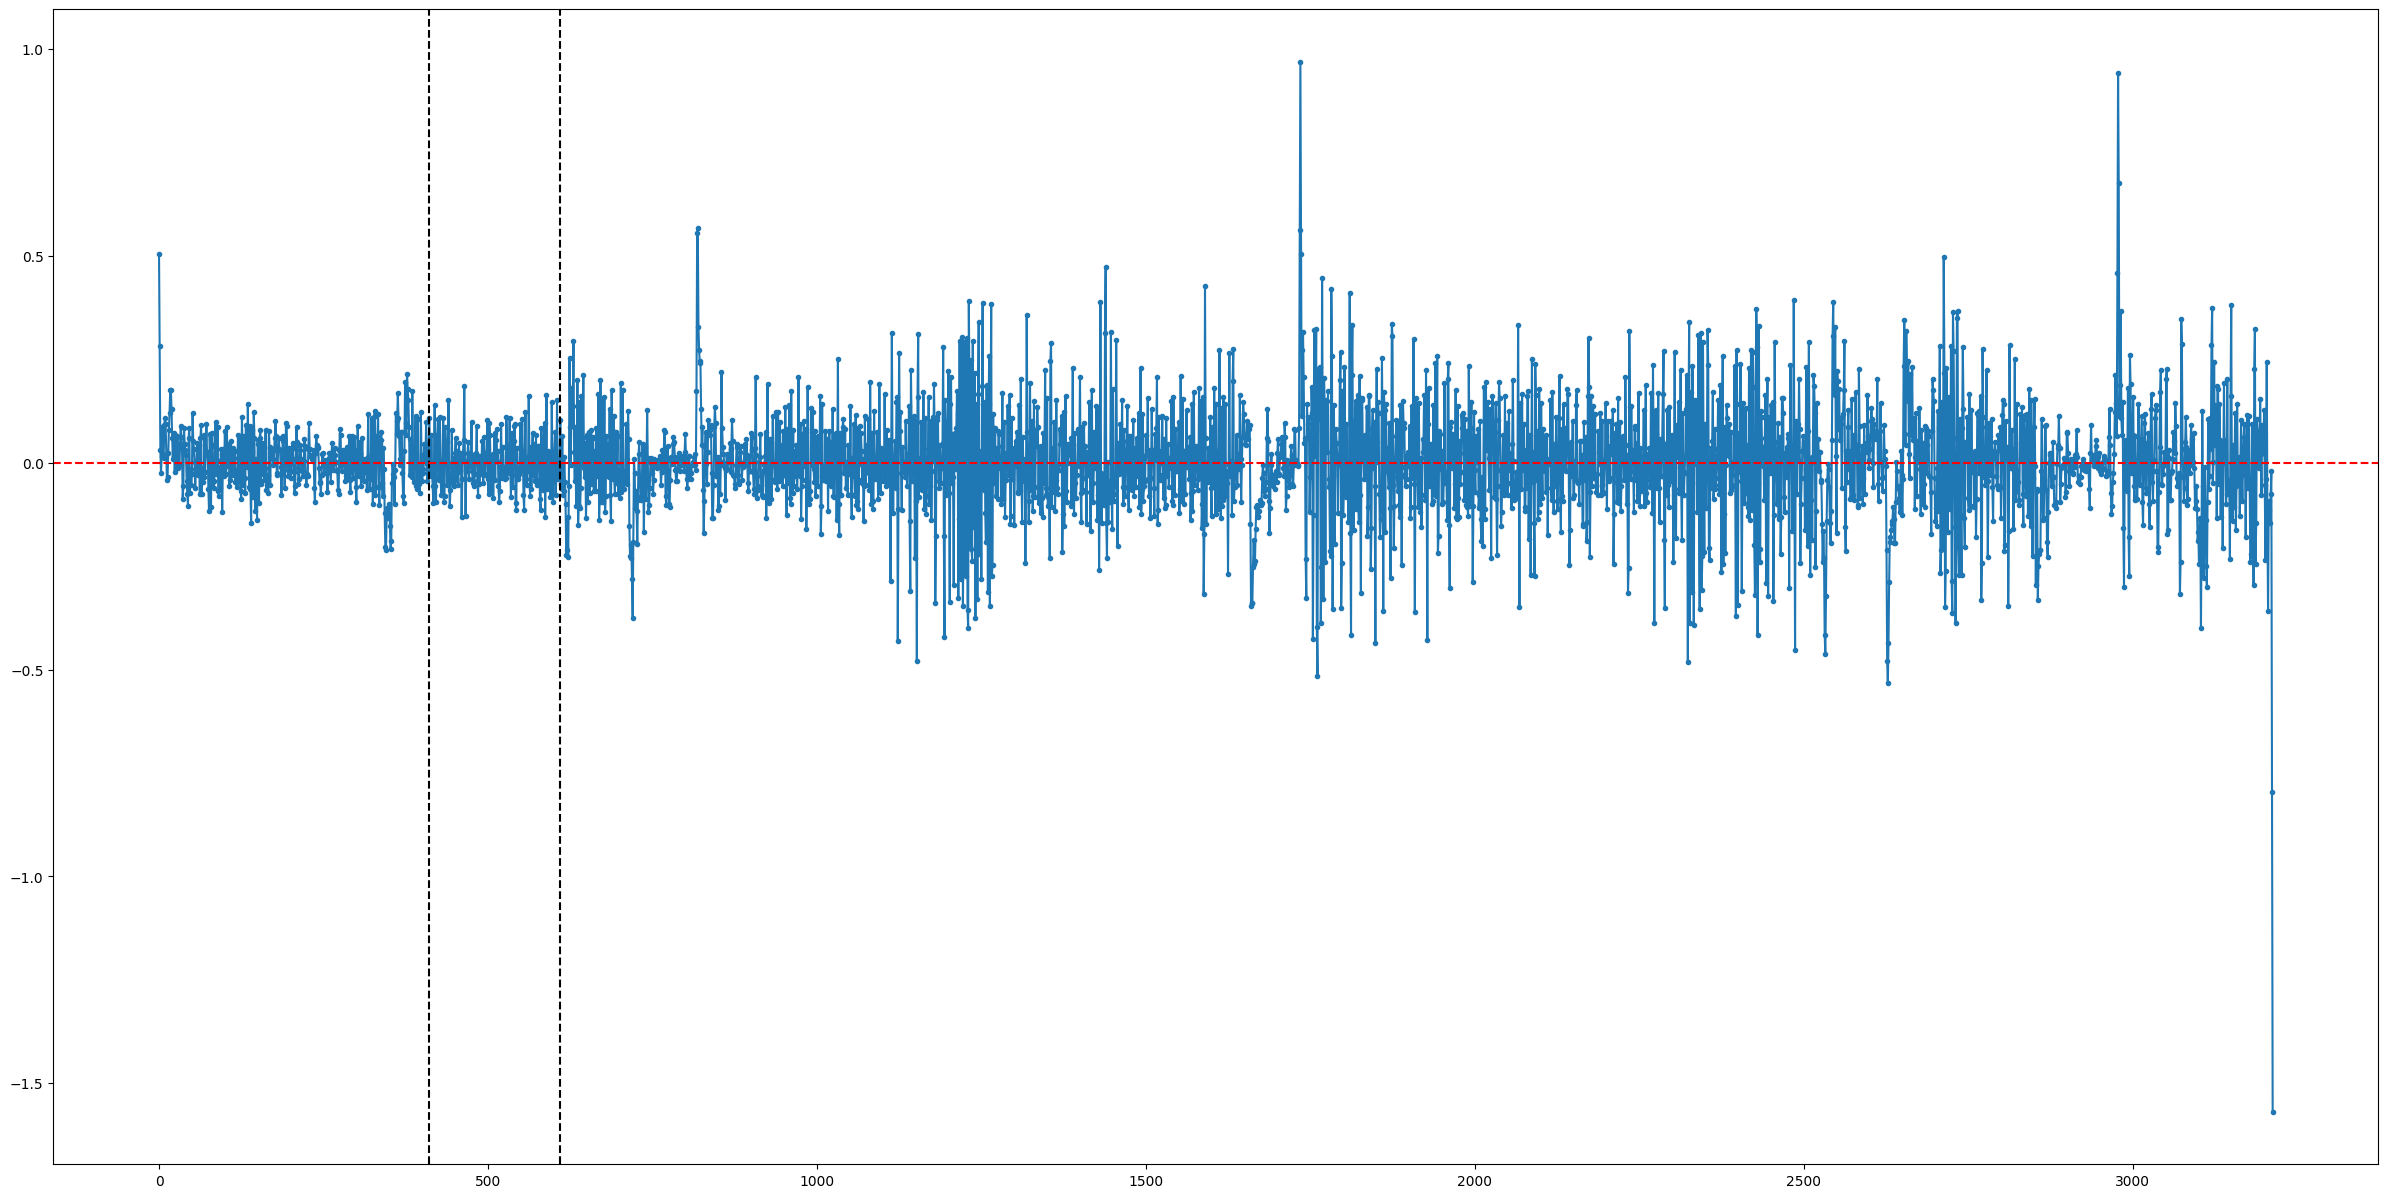

In [24]:
plt.figure(figsize=(30,15))
plt.plot(acceleration, '.-')
cut=[410,610]
plt.axvline(cut[0],ls='--',color='k')
plt.axvline(cut[1],ls='--',color='k');
plt.axhline(0,ls='--',color='r');

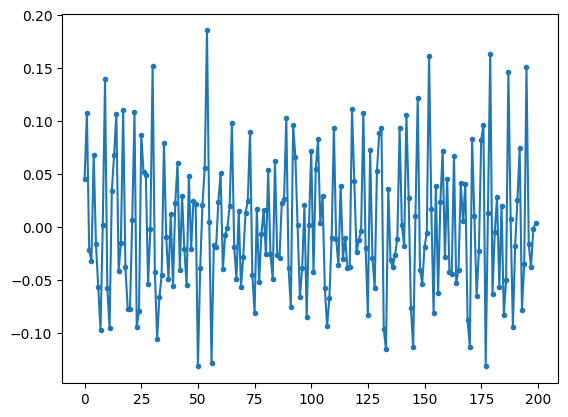

In [25]:
data = acceleration[cut[0]:cut[1]]
plt.plot(data,'.-')